# **Project-4**

***Project Title:*** Customer Segmentation

***Project Description:*** In this project, you will build a machine learning model to segment customers based on their demographics and spending behavior. The data set includes information on customers' age, gender, annual income, and spending score (a metric assigned by the mall based on how much customers spend and how often they visit).

***Dataset Details:*** The data set contains 200 records of customers.

***Datasets Location:*** Canvas -> Modules -> Week 12 -> Datasets -> **"customers.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several unsupervised clustering models on the preprocessed data set, including k-means clustering and DBSCAN.

3) *Model Evaluation:* You will evaluate the clustering results using silhouette and inertia scores. You will also analyze the resulting customer segments and interpret their characteristics.

4) *Deployment:* Once you have identified the customer segments, you can use them to personalize marketing campaigns, improve customer retention, and optimize product recommendations.

This project will give you hands-on experience with unsupervised clustering, data preprocessing, and model evaluation. It also has real-world applications in marketing and e-commerce, where customer segmentation can help businesses tailor their offerings to different customer groups.


import the initial methods that are needed and connect the dataframe

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

customers = pd.read_csv("drive/My Drive/customers.csv")

Mounted at /content/drive


In [13]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Inspect the dataframe to check for any total number of entries and check for null values in each column

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


the next 2 blocks are used to take the gender column and convert it into integer values by seperating it into 2 different columns called male and female

In [33]:
dummies = []

columns = ['Gender']

for col in columns:
  dummies.append(pd.get_dummies(customers[col]))

In [34]:
customers_dummies = pd.concat(dummies, axis=1)
customers_dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


add the new male/female columns back to the rest of the data frame

In [54]:

customers = pd.concat((customers, customers_dummies), axis=1)
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,1


drop the original gender column

In [55]:
customers_new = customers.drop(['CustomerID', 'Gender'], axis=1)
customers_new

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


create a new data frame without the gender columns, so now there is one with and one without them

In [69]:
cust_no_gender = customers_new.drop(['Female', 'Male'], axis=1)
cust_no_gender

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


scale the data frames using MinMaxScaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaled_cust = MinMaxScaler(feature_range=(0, 1)).fit_transform(customers_new)


In [85]:
scaled_cust

array([[0.01923077, 0.        , 0.3877551 , 0.        , 1.        ],
       [0.05769231, 0.        , 0.81632653, 0.        , 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 1.        , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 1.        , 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 1.        , 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 1.        , 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 0.        , 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 1.        , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 0.        , 1.        ],
       [0.32692308, 0.03278689, 1.        , 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 1.        , 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 1.        , 0.        ],
       [0.36538462, 0.04098361, 0.

scale the data frames using MinMaxScaling

In [114]:
scaled_cust_no_g = MinMaxScaler(feature_range=(0, 1)).fit_transform(cust_no_gender)
scaled_cust_no_g


array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

the next 3 blocks attempt to plot the clusters comparing the annual income and the spending scores of each scaled data frame

In [162]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 1], X[:, 2], c=y, s=2)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

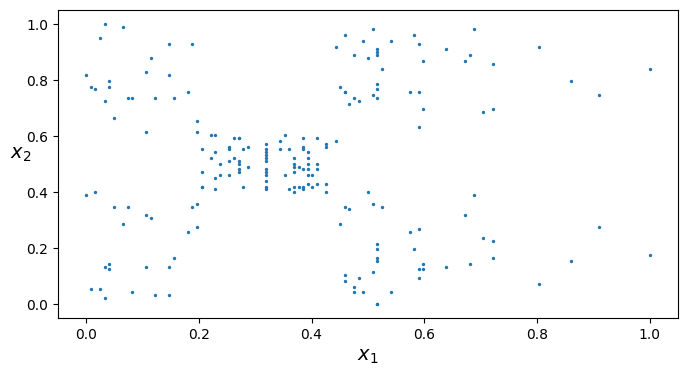

In [163]:
plt.figure(figsize=(8, 4))
plot_clusters(scaled_cust)
plt.show()

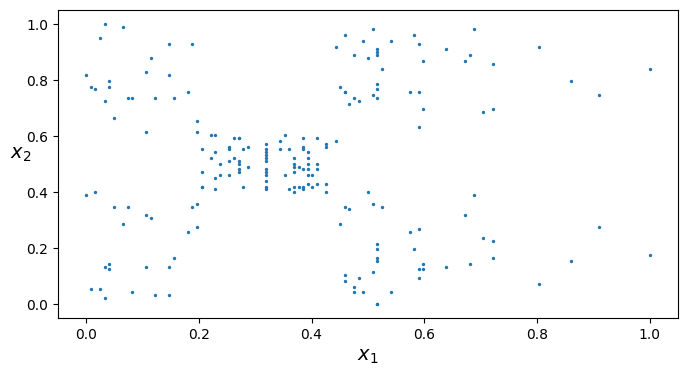

In [164]:
plt.figure(figsize=(8, 4))
plot_clusters(scaled_cust_no_g)
plt.show()

the below for loop is used to visualize the effects of different cluster numbers and help determine the optimal number

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

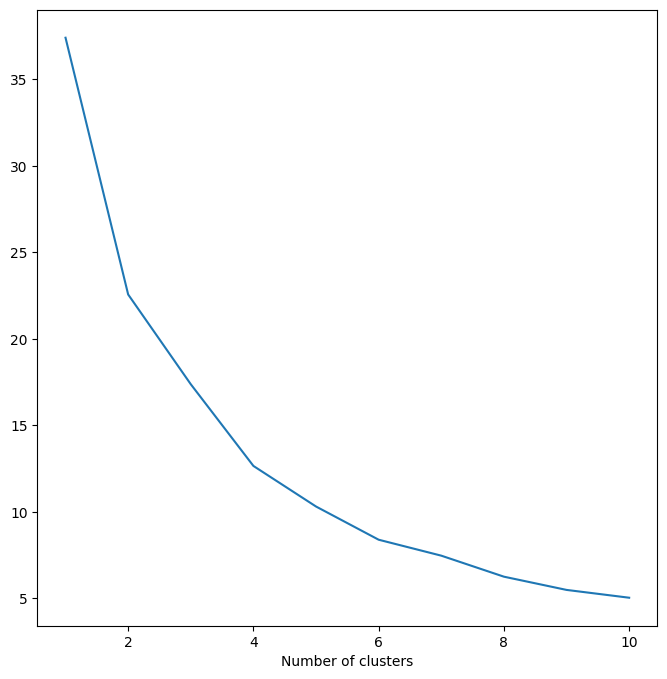

In [192]:
plt.figure(figsize=(8, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_cust_no_g)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.show()

Initialize KMeans with 6 clusters and then fit the data

In [181]:
kmeans = KMeans(n_clusters=6, random_state=42)
y_preds = kmeans.fit_predict(scaled_cust_no_g)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


locations of the 6 clusters centers

In [182]:
kmeans.cluster_centers_

array([[0.56983806, 0.10094909, 0.18367347],
       [0.28605769, 0.58278689, 0.82168367],
       [0.14937388, 0.33415936, 0.4323683 ],
       [0.73717949, 0.32185792, 0.49047619],
       [0.14464883, 0.09265859, 0.79148181],
       [0.5       , 0.61584699, 0.17278912]])

The inertia below shows that the data was clustered very well at 6 clusters

In [183]:
kmeans.inertia_

8.385099035848985

below is the silohouette score showing the similarities of data points in one cluster to another. at both 5 and 7 clusters the inertia decreaseds to 0.40

In [184]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_cust_no_g, kmeans.labels_)

0.4234860620777653

For the DBscan to get better results with this data the eps had to be increased and the min_samples slightly decreased

In [187]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.07, min_samples=4)
dbscan.fit(scaled_cust_no_g)

DBSCAN(eps=0.07, min_samples=4)

In [188]:
print(dbscan.labels_)

[-1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  3  1 -1 -1  1 -1  2 -1 -1  4  2 -1 -1  2 -1 -1  3
  4 -1  4  2 -1 -1  2  3  4 -1 -1  3  2  3 -1  2 -1  3 -1  5  3 -1 -1  2
  3  2  3  5  5  3 -1  2 -1  5  6 -1  6  6  6  5 -1  5  5  5 -1 -1 -1 -1
  2 -1 -1 -1 -1  7 -1 -1 -1  7 -1  7 -1  7 -1  8 -1  7 -1  7 -1  8 -1  8
 -1 -1 -1  7 -1  8 -1 -1 -1  7 -1 -1 -1  7 -1  7 -1  7 -1  8 -1  7 -1  8
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [152]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)
print(dbscan.components_)

2
[ 15 115]
[[0.07692308 0.04098361 0.79591837]
 [0.01923077 0.40983607 0.5       ]]


In [191]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(scaled_cust_no_g).predict(scaled_cust_no_g)
y_pred

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Recommendations:
For kmeans 6 clusters seems to be a good number of clusters as it the inertia starts to decrease as the clusters increase OR decrease from 6

For DBscan the data points being spread out more makes it harder to gauge the distances between some, so increasing the eps and decreasing the number of samples helps to identify the clusters